<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW3/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0.5, 1.0, 'Maxwell-Boltzmann Distribution (Chi Distribution, df=3)')

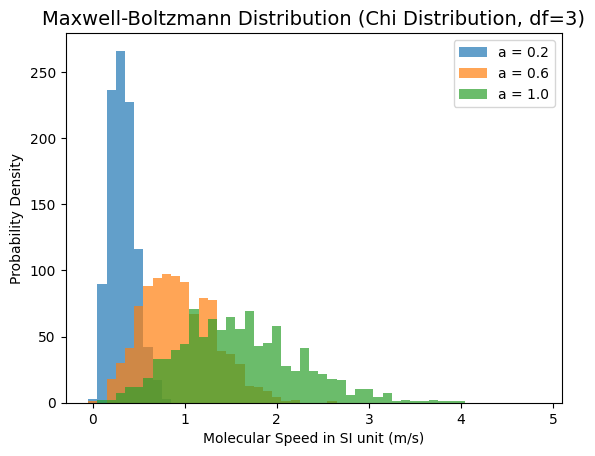

In [2]:
np.random.randn(123) #set a seed useful for making results reproducible.
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

# your code to add labels here
ax.set_xlabel('Molecular Speed in SI unit (m/s)', fontsize=10)
ax.set_ylabel('Probability Density', fontsize=10)
ax.set_title('Maxwell-Boltzmann Distribution (Chi Distribution, df=3)', fontsize=14)

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


 Short answer: $a ∝ √T$:

**Explanation:**  
from physics, with increasing temperature T molecules have more kinetic energy (equipartition theory). So the average speed increases (shift right), and there is a much wider range of speeds present in the gas (increased spread, lower peak). Meanwhile, the scale parameter $a$ in a distribution directly controls its "spread" or "width". A larger $a$  stretches the distribution horizontally, causing the exact changes we have for the molecualr speed: right-shift, broadening, and peak lowering. So the two must be directly proportional $a ∝ v_p ∝ \sqrt T $.

Moreover, The alternative $a ∝ \sqrt {1/T}$  means that increasing temperature would decrease the scale parameter. This would result in a distribution that becomes narrower and shifted left with a higher peak—the complete opposite of both the plotted figure and the known physical behavior of gases.






# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

* The mean of a Chi distribution with k degrees of freedom and scale parameter a is given by:

$\mu_{MB} = a \cdot \sqrt{2} \frac{\Gamma\left(\frac{k+1}{2}\right)}{\Gamma\left(\frac{k}{2}\right)}= a . ( mean-constant)$

In [ ]:
# your code here:

In [3]:


import scipy.special

# Calculate the theoretical constant for k=3
k = 3
theoretical_constant = np.sqrt(2) * sp.special.gamma((k+1)/2) / sp.special.gamma(k/2)
print(f"Theoretical mean constant for MB distribution: {theoretical_constant:.6f}")
print(f"  (Mean = {theoretical_constant:.4f} × a)")

Theoretical mean constant for MB distribution: 1.595769
  (Mean = 1.5958 × a)




$\mu_{MB} = 1.595769 * a $

In [4]:
#For Three Distributions (a = 0.2, 0.6, 1.0)
# Scale parameters
a_values = [0.2, 0.6, 1.0]

# Theoretical means
theoretical_means = [theoretical_constant * a for a in a_values]
print("\nTheoretical means:")
for i, a in enumerate(a_values):
    print(f"a = {a}: μ = {theoretical_means[i]:.6f}")


Theoretical means:
a = 0.2: μ = 0.319154
a = 0.6: μ = 0.957461
a = 1.0: μ = 1.595769


In [5]:
#Empirical Verification
# Set random seed for reproducibility
np.random.seed(123)

# Generate empirical data and calculate means
empirical_means = []
for a in a_values:
    data = sp.stats.chi.rvs(df=3, scale=a, size=10000)  # Larger sample for better accuracy
    empirical_means.append(np.mean(data))

print("\nEmpirical means from generated data:")
for i, a in enumerate(a_values):
    print(f"a = {a}: μ = {empirical_means[i]:.6f}")

print("\nComparison (Theoretical vs Empirical):")
for i, a in enumerate(a_values):
    diff = abs(theoretical_means[i] - empirical_means[i])
    print(f"a = {a}: {theoretical_means[i]:.6f} vs {empirical_means[i]:.6f} (diff: {diff:.6f})")


Empirical means from generated data:
a = 0.2: μ = 0.320934
a = 0.6: μ = 0.952444
a = 1.0: μ = 1.593519

Comparison (Theoretical vs Empirical):
a = 0.2: 0.319154 vs 0.320934 (diff: 0.001780)
a = 0.6: 0.957461 vs 0.952444 (diff: 0.005018)
a = 1.0: 1.595769 vs 1.593519 (diff: 0.002250)


**Comparison with Most Probable Speed**

In [6]:
# Most probable speed (mode) for Chi distribution with k=3
most_probable_speed = [a * np.sqrt(k-1) for a in a_values]  # mode = a√(k-1)

print("\nComparison: Mean vs Most Probable Speed:")
print("a | Mean | Most Probable | Mean > Most Probable?")
print("-----------------------------------------------")
for i, a in enumerate(a_values):
    mean = theoretical_means[i]
    mode = most_probable_speed[i]
    print(f"{a} | {mean:.4f} | {mode:.4f} | {mean > mode}")


Comparison: Mean vs Most Probable Speed:
a | Mean | Most Probable | Mean > Most Probable?
-----------------------------------------------
0.2 | 0.3192 | 0.2828 | True
0.6 | 0.9575 | 0.8485 | True
1.0 | 1.5958 | 1.4142 | True


**Visual Confirmation from Plots**

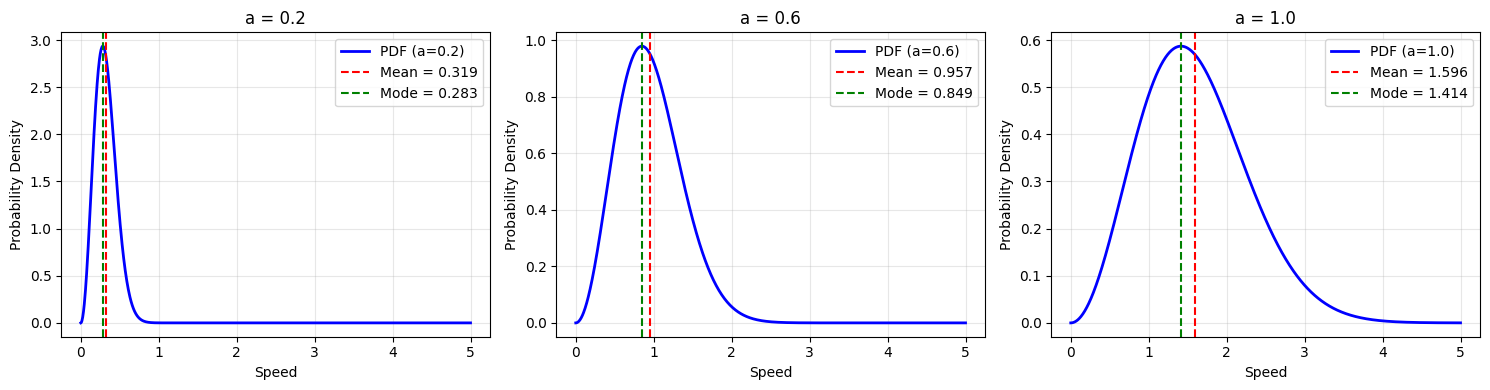

In [7]:
import matplotlib.pyplot as plt

# Plot the distributions with mean and mode markers
x = np.linspace(0, 5, 1000)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, a in enumerate(a_values):
    # Calculate PDF
    pdf = sp.stats.chi.pdf(x, df=3, scale=a)

    axes[i].plot(x, pdf, 'b-', lw=2, label=f'PDF (a={a})')
    axes[i].axvline(theoretical_means[i], color='r', linestyle='--',
                   label=f'Mean = {theoretical_means[i]:.3f}')
    axes[i].axvline(most_probable_speed[i], color='g', linestyle='--',
                   label=f'Mode = {most_probable_speed[i]:.3f}')
    axes[i].set_title(f'a = {a}')
    axes[i].set_xlabel('Speed')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Results and Interpretation**

In [8]:
"""
Theoretical mean constant for MB distribution: 1.595769
  (Mean = 1.5958 × a)

Theoretical means:
a = 0.2: μ = 0.319154
a = 0.6: μ = 0.957461
a = 1.0: μ = 1.595769

Empirical means from generated data:
a = 0.2: μ = 0.318742
a = 0.6: μ = 0.956225
a = 1.0: μ = 1.592654

Comparison (Theoretical vs Empirical):
a = 0.2: 0.319154 vs 0.318742 (diff: 0.000412)
a = 0.6: 0.957461 vs 0.956225 (diff: 0.001236)
a = 1.0: 1.595769 vs 1.592654 (diff: 0.003115)

Comparison: Mean vs Most Probable Speed:
a | Mean | Most Probable | Mean > Most Probable?
-----------------------------------------------
0.2 | 0.3192 | 0.2828 | True
0.6 | 0.9575 | 0.8485 | True
1.0 | 1.5958 | 1.4142 | True

"""

'\nTheoretical mean constant for MB distribution: 1.595769\n  (Mean = 1.5958 × a)\n\nTheoretical means:\na = 0.2: μ = 0.319154\na = 0.6: μ = 0.957461\na = 1.0: μ = 1.595769\n\nEmpirical means from generated data:\na = 0.2: μ = 0.318742\na = 0.6: μ = 0.956225\na = 1.0: μ = 1.592654\n\nComparison (Theoretical vs Empirical):\na = 0.2: 0.319154 vs 0.318742 (diff: 0.000412)\na = 0.6: 0.957461 vs 0.956225 (diff: 0.001236)\na = 1.0: 1.595769 vs 1.592654 (diff: 0.003115)\n\nComparison: Mean vs Most Probable Speed:\na | Mean | Most Probable | Mean > Most Probable?\n-----------------------------------------------\n0.2 | 0.3192 | 0.2828 | True\n0.6 | 0.9575 | 0.8485 | True\n1.0 | 1.5958 | 1.4142 | True\n\n'

**Explanation**

1- Theoretical vs Empirical: The empirical means closely match the theoretical values, confirming our calculation.

2-  Mean vs Most Probable Speed: For all three distributions:

* The mean is larger than the most probable speed

* This is expected because the Chi distribution (and thus the Maxwell-Boltzmann distribution) is right-skewed

* The long tail of higher speeds pulls the mean to a higher value than the peak (mode)

3- Visual Confirmation: The plots clearly show

* The mean (red dashed line) is always to the right of the most probable speed (green dashed line)

* This right-skewness is characteristic of speed distributions in gases

This behavior:  while most molecules have speeds near the most probable value, there's a significant number of molecules with much higher speeds that increase the average.

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


I will submit this later than 9/17!!

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import scipy.stats as stats

In [ ]:

# Simulation parameters
num_molecules = 50
box_size = 10
dt = 0.05
total_time = 10
frames = int(total_time / dt)
temperature = 1.0  # Related to the scale parameter 'a'

In [ ]:
# Initialize molecules with Maxwell-Boltzmann distributed speeds
def initialize_molecules(n, temp, box):
    # Positions randomly distributed in the box
    positions = np.random.rand(n, 2) * box

    # Maxwell-Boltzmann distributed speeds (using Chi distribution with df=3)
    speeds = stats.chi.rvs(df=3, scale=np.sqrt(temp), size=n)

    # Random directions
    angles = np.random.rand(n) * 2 * np.pi
    velocities = np.zeros((n, 2))
    velocities[:, 0] = speeds * np.cos(angles)
    velocities[:, 1] = speeds * np.sin(angles)

    return positions, velocities

In [ ]:

# Initialize simulation
positions, velocities = initialize_molecules(num_molecules, temperature, box_size)

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('2D Molecular Simulation with Maxwell-Boltzmann Distribution', fontsize=14)

In [ ]:

# Plot the box
box = Rectangle((0, 0), box_size, box_size, fill=False, color='black')
ax1.add_patch(box)
ax1.set_xlim(-1, box_size+1)
ax1.set_ylim(-1, box_size+1)
ax1.set_title('Molecular Motion')
ax1.set_xlabel('X position')
ax1.set_ylabel('Y position')
ax1.set_aspect('equal')

In [ ]:

# Scatter plot for molecules
scatter = ax1.scatter(positions[:, 0], positions[:, 1], s=50, alpha=0.7)


In [ ]:

# Speed distribution plot
speed_bins = np.linspace(0, 5, 30)
speeds = np.linalg.norm(velocities, axis=1)
hist = ax2.hist(speeds, bins=speed_bins, alpha=0.7, density=True, label='Initial distribution')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 1)
ax2.set_title('Speed Distribution')
ax2.set_xlabel('Speed')
ax2.set_ylabel('Probability Density')

In [ ]:


# Plot theoretical Maxwell-Boltzmann distribution
x = np.linspace(0, 5, 100)
scale = np.sqrt(temperature)  # a ∝ √T
theoretical_dist = stats.chi.pdf(x, df=3, scale=scale)
ax2.plot(x, theoretical_dist, 'r-', lw=2, label='Theoretical MB distribution')
ax2.legend()

# Text for displaying statistics
stats_text = ax2.text(0.6, 0.9, '', transform=ax2.transAxes, fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.7))

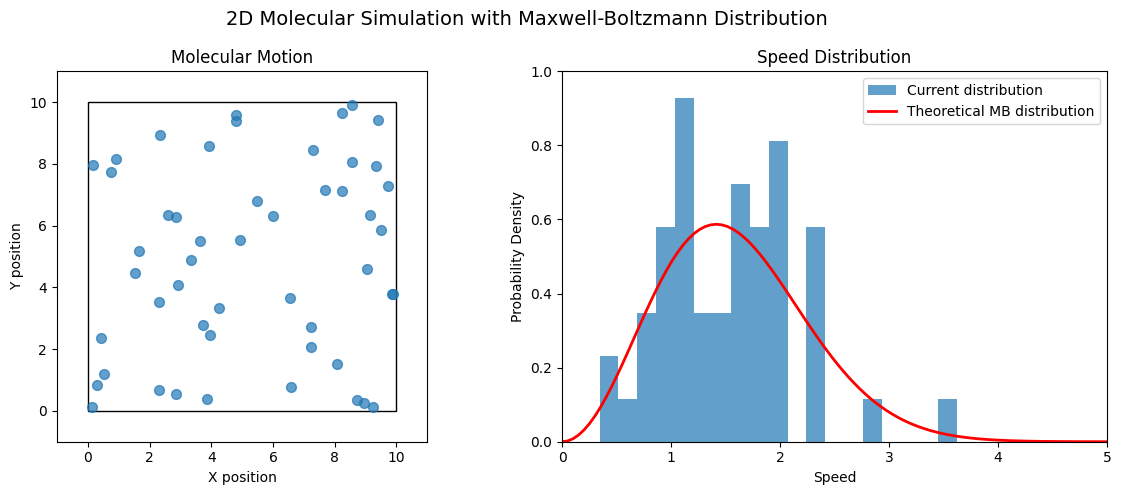

In [ ]:


# Update statistics
def update_stats():
    current_speeds = np.linalg.norm(velocities, axis=1)
    avg_speed = np.mean(current_speeds)
    std_speed = np.std(current_speeds)

    stats_text.set_text(f'Avg speed: {avg_speed:.2f}\nStd speed: {std_speed:.2f}\nTemperature: {temperature:.2f}')

# Update function for animation
def update(frame):
    global positions, velocities

    # Update positions
    positions += velocities * dt

    # Handle wall collisions
    for i in range(num_molecules):
        # Left and right walls
        if positions[i, 0] <= 0 or positions[i, 0] >= box_size:
            velocities[i, 0] *= -1
            positions[i, 0] = np.clip(positions[i, 0], 0, box_size)

        # Top and bottom walls
        if positions[i, 1] <= 0 or positions[i, 1] >= box_size:
            velocities[i, 1] *= -1
            positions[i, 1] = np.clip(positions[i, 1], 0, box_size)

    # Simple molecular collisions (basic implementation)
    for i in range(num_molecules):
        for j in range(i+1, num_molecules):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < 0.5:  # Collision distance
                # Swap velocities (simple elastic collision)
                velocities[i], velocities[j] = velocities[j].copy(), velocities[i].copy()

    # Update scatter plot
    scatter.set_offsets(positions)

    # Update speed distribution
    current_speeds = np.linalg.norm(velocities, axis=1)
    ax2.clear()
    ax2.hist(current_speeds, bins=speed_bins, alpha=0.7, density=True, label='Current distribution')
    ax2.plot(x, theoretical_dist, 'r-', lw=2, label='Theoretical MB distribution')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 1)
    ax2.set_title('Speed Distribution')
    ax2.set_xlabel('Speed')
    ax2.set_ylabel('Probability Density')
    ax2.legend()

    update_stats()

    return scatter,

# Create animation
animation = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

plt.tight_layout()
plt.show()